## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine


data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [4]:
X.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [5]:
X[:].apply(lambda x: print(x.value_counts()))

12.37    6
13.05    6
12.08    5
12.29    4
12.00    3
        ..
13.34    1
13.69    1
13.90    1
13.84    1
13.75    1
Name: alcohol, Length: 126, dtype: int64
1.73    7
1.81    4
1.67    4
1.68    3
1.61    3
       ..
3.45    1
2.51    1
4.61    1
3.83    1
2.68    1
Name: malic_acid, Length: 133, dtype: int64
2.30    7
2.28    7
2.70    6
2.36    6
2.32    6
       ..
2.16    1
2.78    1
2.53    1
1.71    1
1.95    1
Name: ash, Length: 79, dtype: int64
20.0    15
21.0    11
16.0    11
18.0    10
19.0     9
        ..
19.4     1
11.2     1
21.6     1
18.1     1
14.8     1
Name: alcalinity_of_ash, Length: 63, dtype: int64
88.0     13
86.0     11
98.0      9
101.0     9
96.0      8
102.0     7
112.0     6
85.0      6
94.0      6
80.0      5
92.0      5
89.0      5
97.0      5
103.0     5
107.0     4
106.0     4
90.0      4
108.0     4
104.0     3
111.0     3
78.0      3
116.0     3
95.0      3
120.0     3
110.0     3
100.0     3
87.0      3
84.0      3
118.0     3
93.0      2
115.0  

alcohol                         None
malic_acid                      None
ash                             None
alcalinity_of_ash               None
magnesium                       None
total_phenols                   None
flavanoids                      None
nonflavanoid_phenols            None
proanthocyanins                 None
color_intensity                 None
hue                             None
od280/od315_of_diluted_wines    None
proline                         None
dtype: object

##### Замечаем, что в наборе нет пропущенных данных и категориальных признаков

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [94]:
from sklearn.model_selection import train_test_split


np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf3 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf4 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf5 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
clf6 = KNeighborsClassifier(n_neighbors=25, metric='euclidean')

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_train = pd.DataFrame(X_train_norm, columns = data['feature_names'])
X_test_norm = normalizer.transform(X_test)
X_test = pd.DataFrame(X_test_norm, columns = data['feature_names'])

In [98]:
print("NN\tTrain\t\t\tTest")
clf_array = [clf1, clf2, clf3, clf4, clf5, clf6]
for clf in clf_array:
    clf.fit(X_train[['alcohol', 'magnesium']], y_train)
    y_predicted1 = clf.predict(X_train[['alcohol', 'magnesium']])
    y_predicted2 = clf.predict(X_test[['alcohol', 'magnesium']])
    print(f"{clf.n_neighbors}\t{accuracy_score(y_train, y_predicted1)}\t{accuracy_score(y_test, y_predicted2)}")

NN	Train			Test
1	0.9919354838709677	0.6851851851851852
3	0.8145161290322581	0.6851851851851852
5	0.7983870967741935	0.7222222222222222
10	0.7419354838709677	0.7777777777777778
15	0.6774193548387096	0.8148148148148148
25	0.7096774193548387	0.7962962962962963


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [56]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [58]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

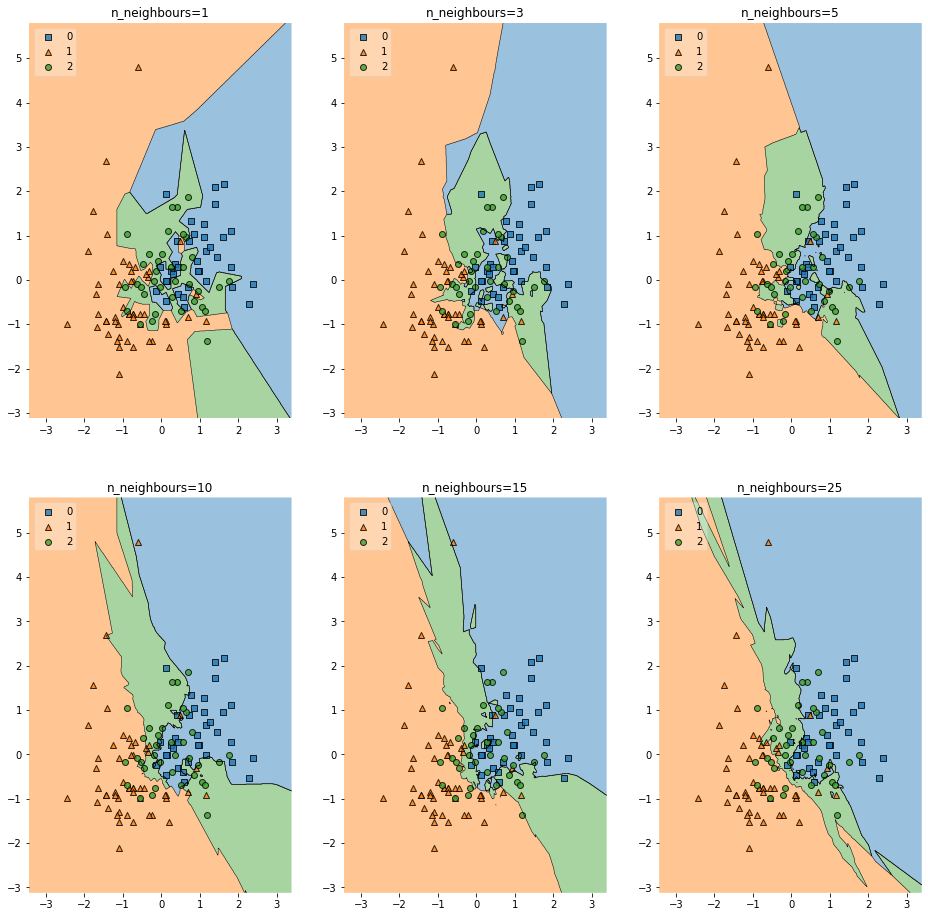

In [477]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


figure = plt.figure(figsize=(16,16))
gs = gridspec.GridSpec(2, 3, figure)
#figure = plt.figure(figsize=(16,16))

for clf, grd in zip(clf_array, itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    figure = plot_decision_regions(np.array(X_train[['alcohol', 'magnesium']]), np.array(y_train), clf=clf, legend=2)
    plt.title(f'n_neighbours={clf.n_neighbors}')

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

##### По таблице если судить по accuracy на тренировочной выборе, то лучшим явлется количества соседей 1, но это будет переобучением и на тестовой выборке данный гиперпараметр показываем себя плохо. Нам важно чтобы алгоритм хорошо работал на новых данных, а по таблице лучшее accuracy при 15 лучших соседях. Если посмотреть теперь на решающие поверхности, то наиболее оптимальными являются количество соседей 10 и 15, там более менее равномерные границы и алгоритм почти не реагирует на шумы. Подытоживая, можно сказать что оптимальным является число соседей 15.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

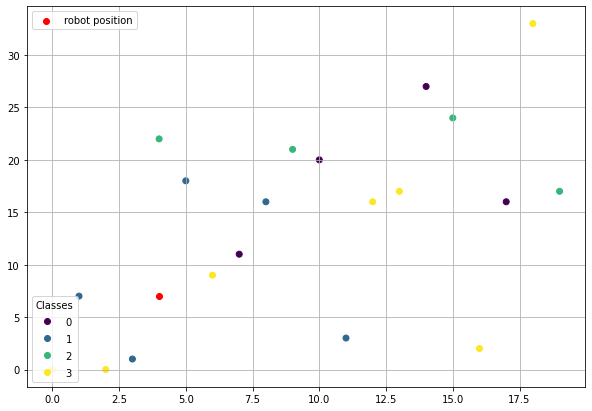

In [307]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [308]:
from sklearn.neighbors import KNeighborsClassifier

In [315]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
        
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        self.k = k
        self.initial_position = initial_position
        self.landmarks = landmarks
        self.classes = classes
        
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        if np.random.binomial(1, 0.2):
            # вправо
            self.trajectory = np.vstack((self.trajectory, self.trajectory[-1] + mapping[0]))
        else:
            # по соседям
            self.trajectory = np.vstack((self.trajectory, self.trajectory[-1] + mapping[self.knn.predict([self.trajectory[-1]])[0]]))

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [331]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

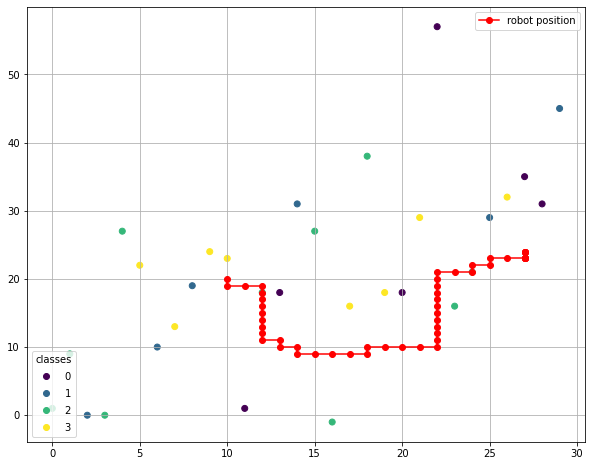

In [332]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

Text(0.5, 1.0, 'n_neighbours=30')

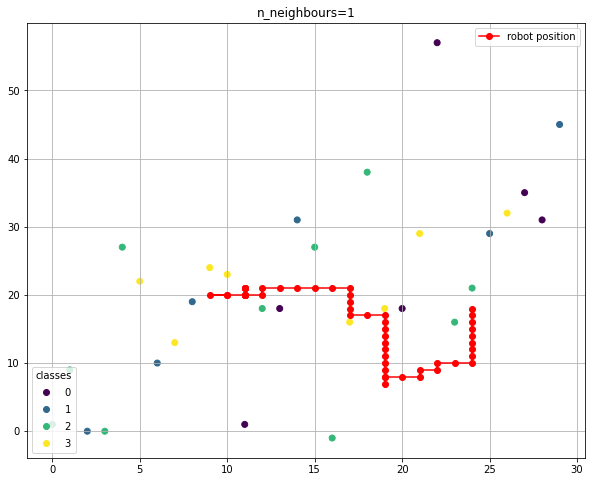

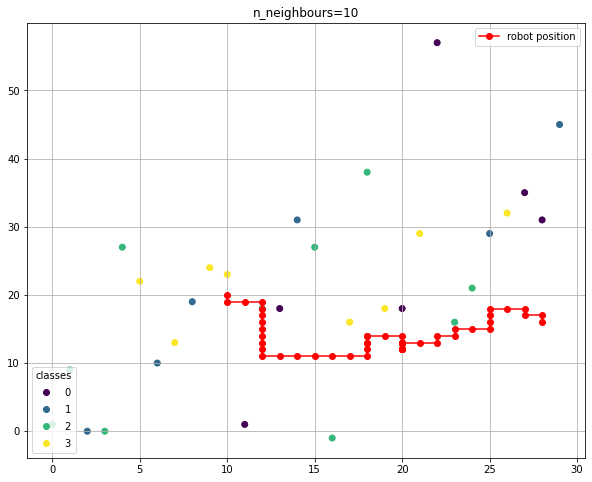

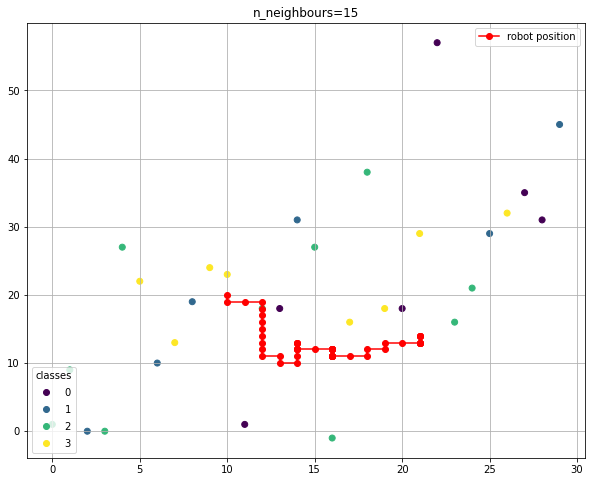

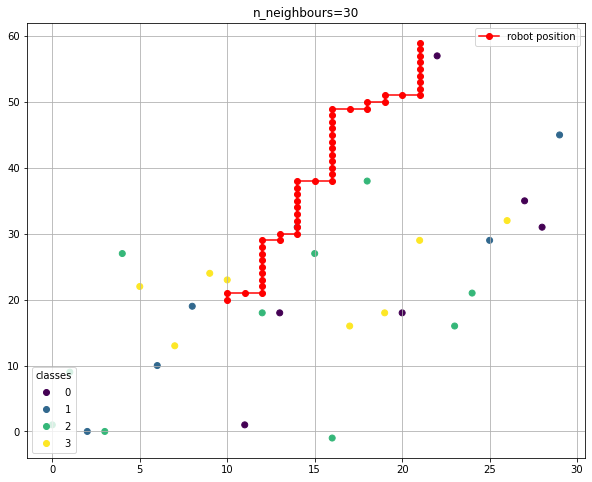

In [335]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)
plt.title("n_neighbours=1")
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)
plt.title("n_neighbours=10")
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)
plt.title("n_neighbours=15")
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)
plt.title("n_neighbours=30")

##### Можно заметить, что чем больше соседей подается в функцию, тем меннее продолжительный путь проделывает робот визуально, то есть он по несколько раз проходит через одну точку и из-за этого его пути накладываются и кажется, что он прошел более короткий путь чем при меньшем количестве указанных соседей (особенно явно это наблюдается при n_neighbpurs=15), а при 30 робот вообще в основном будет двигаться в направлении доминирующего класса, поскольку всего точек 30 и соседей выбрано 30, только с вероятностью 0.2 он будет отклоняться от заданного направления и двигаться вправо.

##### Не уверен, что правильно понял 2й вопрос, но если предположить, что классы назначаются меткам не произвльно, а, например, так, что они образуют области классов, где в каждоый области находится один доминирующий класс и возможно пару меток других классов в виде шумов, то в зависимости от того, в какой области находится робот, он в основном будет двигаться в направлении  класса, в области которого он находится. Но это также зависит от n_neighbours, если указать как выше 30, то роботу будет все равно на область, в которой он находится, и он будет двигаться в направлении доминирующего класса среди всех 30 точек.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [3]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

FileNotFoundError: [Errno 2] File data/diamonds.csv does not exist: 'data/diamonds.csv'

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [861]:
data.isnull().any().any()

False

In [862]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

##### Таковым столбцом явлется столбец нумерации, поэтому удалим только его, остальные признаки имеют значение.

In [863]:
del data['Unnamed: 0']

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [864]:
correlation_table = data.corr()
correlation_table

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [865]:
data_features_mask = (data.dtypes == "object").values

In [866]:
from sklearn.preprocessing import OneHotEncoder

data_new = OneHotEncoder(drop='first').fit_transform(data[data.columns[data_features_mask]]).toarray()
data_numb = data[data.columns[~data_features_mask]]

In [867]:
data_obj = pd.DataFrame(data_new)

In [868]:
data = pd.concat([data_numb, data_obj], axis=1)
data

,carat,depth,table,price,x,y,z,0,1,2,...,7,8,9,10,11,12,13,14,15,16
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

##### Перед разделением выборки на тренировочную и тестовую разделим датасет на признаки и целевую переменную.

In [869]:
y = data['price']
data = data.drop('price', axis=1)
data

,carat,depth,table,x,y,z,0,1,2,3,...,7,8,9,10,11,12,13,14,15,16
0,0.23,61.5,55.0,3.95,3.98,2.43,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [870]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=1234567)

In [871]:
X_train

,carat,depth,table,x,y,z,0,1,2,3,...,7,8,9,10,11,12,13,14,15,16
53057,0.72,60.9,60.0,5.78,5.75,3.51,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
503,0.70,59.7,58.0,5.82,5.77,3.46,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53223,0.50,61.9,55.1,5.07,5.10,3.15,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48830,0.70,63.3,60.0,5.57,5.65,3.55,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26680,0.30,59.5,60.0,4.39,4.45,2.63,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38882,0.40,62.8,57.0,4.72,4.68,2.95,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39237,0.51,62.5,58.0,5.05,5.12,3.18,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26950,2.01,59.9,62.0,8.15,8.04,4.85,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15988,1.01,63.3,60.0,6.30,6.33,4.00,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [872]:
from sklearn.preprocessing import StandardScaler


real_index = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train[real_index]), 
                              columns=real_index)
X_train_no_changes = X_train.drop(real_index, axis=1)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test[real_index]), 
                             columns=real_index)
X_test_no_changes = X_test.drop(real_index, axis=1)


In [873]:
X_train = pd.DataFrame(data=np.hstack((X_train_scaled, X_train_no_changes)), 
                       columns=X_train.columns)
X_test = pd.DataFrame(data=np.hstack((X_test_scaled, X_test_no_changes)), 
                      columns=X_test.columns) 

In [874]:
X_train

,carat,depth,table,x,y,z,0,1,2,3,...,7,8,9,10,11,12,13,14,15,16
0,-0.165104,-0.593219,1.140112,0.042837,0.014545,-0.041113,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.207249,-1.430322,0.244604,0.078469,0.032491,-0.113008,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.628703,0.104366,-1.053882,-0.589634,-0.568673,-0.558762,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.207249,1.080986,1.140112,-0.144232,-0.075181,0.016404,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.050157,-1.569840,1.140112,-1.195381,-1.151892,-1.306477,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,-0.839430,0.732193,-0.203149,-0.901416,-0.945522,-0.846345,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37754,-0.607631,0.522918,0.244604,-0.607450,-0.550728,-0.515624,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37755,2.553274,-1.290805,2.035620,2.154043,2.069270,1.885693,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37756,0.446004,1.080986,1.140112,0.506055,0.534956,0.663466,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [875]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression().fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test))))

Train: 1265786.240233778
Test: 1574114.1597466196


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [876]:
lr.coef_

array([ 5332.78780927,   -67.12118596,   -62.53816648, -2229.50678352,
        1273.4743578 ,  -200.36199109,   506.10151985,   766.86426469,
         760.48799618,   641.34060498,  -188.95286157,  -270.95146545,
        -474.0734367 ,  -958.33201517, -1448.9221772 , -2388.68112203,
        5257.87386518,  3620.25787531,  2665.19281277,  4521.99715845,
        4217.74283409,  4959.46835274,  4890.42479542])

##### Вещественным у нас являются только первые 6 столбцов, и среди них наибольшими коэффициентами обладают carat и столбец x.

##### Если рассматривать и закодированные столбцы как вещественные, то наибольшим весом обладают следующие признаки.

In [877]:
coefficients = np.abs(lr.coef_)
col_max = np.argpartition(coefficients, 3)[-3:]
X_train.columns[col_max]

Index([10, 15, 'carat'], dtype='object')

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [878]:
from sklearn.linear_model import Ridge, Lasso


ridge = Ridge(10).fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test))))
ridge.coef_

Train: 1269910.1086702854
Test: 1482436.5185101528


array([ 5279.70398464,   -71.69732701,   -66.08302077, -1940.33089957,
        1025.09364865,  -199.56924485,   549.6513625 ,   811.7305087 ,
         792.75823349,   692.99582765,  -177.24390751,  -258.86897836,
        -457.1552045 ,  -941.64048177, -1423.39424403, -2349.92497652,
        4680.91550539,  3085.89656057,  2137.68744754,  3979.57712889,
        3680.09025518,  4404.17177562,  4342.10885519])

In [879]:
lasso = Lasso(10).fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test))))
lasso.coef_

Train: 1502232.3900090442
Test: 1539099.0770741035


array([ 4784.45704793,  -156.21090337,  -114.81629125,  -684.94754668,
          -0.        ,   -45.87310803,    -0.        ,   162.1299742 ,
          90.33476178,    83.87849541,    17.31573693,    -0.        ,
        -114.19846643,  -584.80890037,  -975.90940459, -1779.40192205,
        1259.64520201,     0.        ,  -804.29293971,   815.40149532,
         575.52408301,  1156.46052797,  1150.95819196])

##### По результатам обеих регрессией Ridge уменьшила веса незначительно, они практические не отличаются от весов обычной линейной регрессии без регуляризатора, а в Lasso же видно резкое снижение коэффициентов, 5 из них даже занулились, а другие не превышают 2000. Значит, проблема мультиколлинераности достаточно сильно проявлялась в стандартной регрессии.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13446959846.881865, tolerance: 60041732.361321144
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414015009.6138916, tolerance: 60041732.361321144
  model = cd_fast.enet_coordinate_descent(


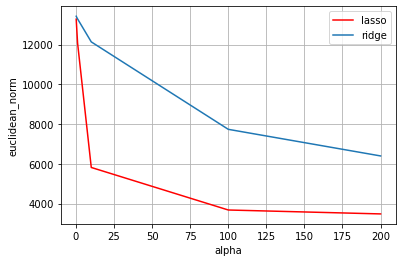

In [880]:
from matplotlib import pyplot as plt
import seaborn as sns


arr_lasso = []
arr_ridge = []
coef_array = [0.1, 1, 10, 100, 200]
for coef in coef_array:
    lasso = Lasso(coef).fit(X_train,y_train)
    ridge = Ridge(coef).fit(X_train,y_train)
    arr_lasso.append(np.linalg.norm(lasso.coef_))
    arr_ridge.append(np.linalg.norm(ridge.coef_))

    
plt.plot(coef_array, arr_lasso, 'r', coef_array, arr_ridge)
plt.legend(['lasso','ridge'], loc=1)
plt.grid(True)
plt.xlabel("alpha")
plt.ylabel("euclidean_norm")
plt.show()

##### По графику видно, что лассо сильнее уменьшает веса, а это и является причиной того, что его часто используют, поскольку большие веса - признак переобучения.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [881]:
from sklearn.linear_model import LassoCV


alphas = np.arange(0.1, 2.1, 0.1)
regr = LassoCV(cv=5, alphas=alphas).fit(X_train, y_train)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53733661.36437988, tolerance: 48208687.03498435
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68497540.99784851, tolerance: 48208687.03498435
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99582363.23461151, tolerance: 48208687.03498435
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWar

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13446959846.881865, tolerance: 60041732.361321144
  model = cd_fast.enet_coordinate_descent(


In [882]:
regr.alphas_

array([2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1. , 0.9, 0.8,
       0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

In [883]:
regr.alphas_[np.argmin(np.mean(regr.mse_path_, axis=1))]

0.1

##### Замечаем, что наименьшее среднее MSE будет при альфа равным 0.6, то есть при данном альфа будет лучшее качество.

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [885]:
lasso = Lasso(0.1).fit(X_train,y_train)
lasso.coef_

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13446959846.881865, tolerance: 60041732.361321144
  model = cd_fast.enet_coordinate_descent(


array([ 5322.34854041,   -68.14945505,   -63.77616523, -2022.1141573 ,
        1080.73533321,  -205.23569365,   507.4220643 ,   766.53537172,
         753.32228879,   645.50849475,  -183.61301542,  -265.73999747,
        -468.50903177,  -953.2007713 , -1441.77193236, -2379.66444717,
        5209.67073003,  3573.63213315,  2618.21175146,  4475.07293017,
        4171.01910374,  4912.28490294,  4843.76520821])

##### Наименьшими весами обладают признаки 'y' и 'z', и это логично, поскольку они определяют ширину и глубину бриллианта, что действительно являются произвольными данными особо никак не влияющих на ценность. Наибольшими же весами обладают признаки 'carat' и некоторые закодированные признаки. В данном случае, логически рассуждая, карат имеет достаточно большое значение при определении стоимости бриллианта.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [886]:
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test))))

Train: 1265919.0613642577
Test: 1497476.753787544


##### MSE для обученной Lasso регрессии с наилучшим коэффициентом регуляризации меньше, чем при обычной линейной регрессии (MSE обычн. лин. регр. = 1574114.1597466196). Значит, для предсказаний лучше использовать Lasso, поскольку она позволяет не подстраиваться под выбросы в тренировочной выборке и помогает лучше предиктить на новых данных.